In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 26.1 MB/s 
     |████████████████████████████████| 7.6 MB 53.5 MB/s 
     |████████████████████████████████| 163 kB 71.2 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [3]:
df = pd.read_csv('/content/Reviews.csv')
df = df.head(5000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(5000, 10)

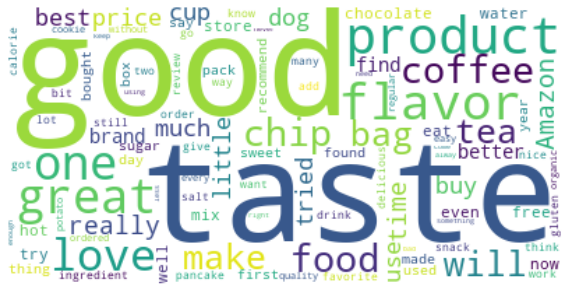

In [5]:
from wordcloud import STOPWORDS
all_text = " ".join(df.Text)
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=100, stopwords=['br']+list(STOPWORDS)).generate(all_text)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

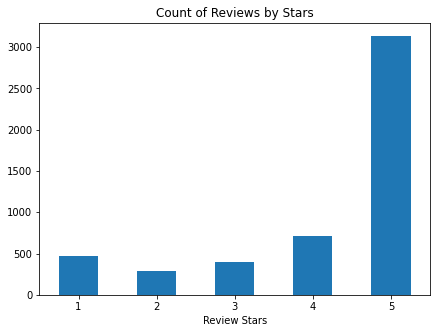

In [6]:
# EDA
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar', title='Count of Reviews by Stars', figsize=(7,5)
)
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()

In [7]:
df['Text'].isna().sum()

0

In [8]:
# How many 5 stars! Drop some 5 star rows!
df = df.sample(frac=1)
df_before = df.loc[(df['Score']!=5) & (df['Id']<3700),]
df_after = df.loc[df['Id']>=3700,]
df = pd.concat([df_before, df_after])
df = df.sample(frac=1)
df['Id'] = np.arange(0, len(df))
df = df.reset_index()
df = df.drop(columns=['index'])
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,B005K4Q1VI,ALD467ZEFBPDF,"DenDen ""Dennis""",0,0,4,1327881600,Not bad for the price!,I like to brew a k-cup cocoa into my coffee fo...
1,1,B000UZVPKO,A9GIGJUB98JNR,"Chen Sun ""WebAndNet.com""",4,5,5,1236816000,water low sodium sardines that actually taste ...,Water based sardines without salt is.... awwfu...
2,2,B0076ZJ21K,A1DLYF1IJL2337,S. He,1,1,5,1344556800,very nice plant,cool! I got it last weekend. I was suprised ab...
3,3,B005K4Q1VI,A2CJKQ0DOE5ARF,"Ross H. Reddick ""RossPDX""",0,0,1,1348099200,Disgusting,Looks like and tastes like chocolate colored w...
4,4,B005LURDB8,A2TTAGETIN1QEF,Nelson Ray,0,0,3,1346976000,Smaller Than Expected,Thought these were the larger sized ones you s...


In [9]:
df.shape

(2682, 10)

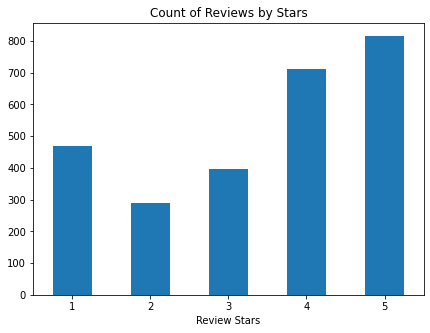

In [10]:
ax = df['Score'].value_counts().sort_index().plot(
    kind='bar', title='Count of Reviews by Stars', figsize=(7,5)
)
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Basic NLTK
nltk.download('punkt')
example = df['Text'][50]
ex_tk = nltk.word_tokenize(example)
ex_tk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['These',
 'singles',
 'sell',
 'for',
 '$',
 '2.50',
 '-',
 '$',
 '3.36',
 'at',
 'the',
 'store',
 'for',
 '1',
 'box',
 'of',
 '24',
 'singles',
 '.',
 'I',
 "'m",
 'not',
 'sure',
 'why',
 'Amazon',
 'is',
 'selling',
 'it',
 'for',
 '$',
 '9.99',
 'for',
 'a',
 'box',
 'of',
 '24',
 'singles',
 '.',
 'Hazelnut',
 'coffee',
 'creamer',
 'is',
 'my',
 'favorite',
 ',',
 'but',
 'truly',
 'this',
 'is',
 'not',
 'a',
 'good',
 'buy',
 '.']

In [12]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(ex_tk)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('These', 'DT'),
 ('singles', 'NNS'),
 ('sell', 'VBP'),
 ('for', 'IN'),
 ('$', '$'),
 ('2.50', 'CD'),
 ('-', ':'),
 ('$', '$'),
 ('3.36', 'CD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('store', 'NN'),
 ('for', 'IN'),
 ('1', 'CD'),
 ('box', 'NN'),
 ('of', 'IN'),
 ('24', 'CD'),
 ('singles', 'NNS'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('not', 'RB'),
 ('sure', 'JJ'),
 ('why', 'WRB'),
 ('Amazon', 'NNP'),
 ('is', 'VBZ'),
 ('selling', 'VBG'),
 ('it', 'PRP'),
 ('for', 'IN'),
 ('$', '$'),
 ('9.99', 'CD'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('box', 'NN'),
 ('of', 'IN'),
 ('24', 'CD'),
 ('singles', 'NNS'),
 ('.', '.'),
 ('Hazelnut', 'NNP'),
 ('coffee', 'NN'),
 ('creamer', 'NN'),
 ('is', 'VBZ'),
 ('my', 'PRP$'),
 ('favorite', 'JJ'),
 (',', ','),
 ('but', 'CC'),
 ('truly', 'RB'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('buy', 'NN'),
 ('.', '.')]

In [13]:
# VADER
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [14]:
nltk.download('vader_lexicon')
my_sia = SentimentIntensityAnalyzer()
my_sia.polarity_scores(df['Text'][50])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.12, 'neu': 0.76, 'pos': 0.12, 'compound': 0.2502}

In [15]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    my_id = row['Id']
    score = my_sia.polarity_scores(text)
    result[my_id] = score

100%|██████████| 2682/2682 [00:02<00:00, 1018.13it/s]


In [16]:
result_df = pd.DataFrame(result).T
result_df.head()

,neg,neu,pos,compound
0,0.068,0.679,0.253,0.8323
1,0.000,0.739,0.261,0.7469
2,0.000,0.869,0.131,0.6116
3,0.116,0.689,0.195,0.5859
4,0.058,0.753,0.189,0.9675


In [17]:
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, how='left')
result_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0.068,0.679,0.253,0.8323,B005K4Q1VI,ALD467ZEFBPDF,"DenDen ""Dennis""",0,0,4,1327881600,Not bad for the price!,I like to brew a k-cup cocoa into my coffee fo...
1,1,0.000,0.739,0.261,0.7469,B000UZVPKO,A9GIGJUB98JNR,"Chen Sun ""WebAndNet.com""",4,5,5,1236816000,water low sodium sardines that actually taste ...,Water based sardines without salt is.... awwfu...
2,2,0.000,0.869,0.131,0.6116,B0076ZJ21K,A1DLYF1IJL2337,S. He,1,1,5,1344556800,very nice plant,cool! I got it last weekend. I was suprised ab...
3,3,0.116,0.689,0.195,0.5859,B005K4Q1VI,A2CJKQ0DOE5ARF,"Ross H. Reddick ""RossPDX""",0,0,1,1348099200,Disgusting,Looks like and tastes like chocolate colored w...
4,4,0.058,0.753,0.189,0.9675,B005LURDB8,A2TTAGETIN1QEF,Nelson Ray,0,0,3,1346976000,Smaller Than Expected,Thought these were the larger sized ones you s...


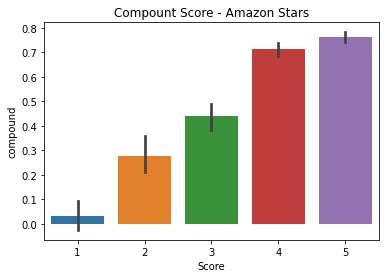

In [18]:
sns.barplot(x=result_df['Score'], y=result_df['compound'])
plt.title('Compount Score - Amazon Stars')
plt.show()

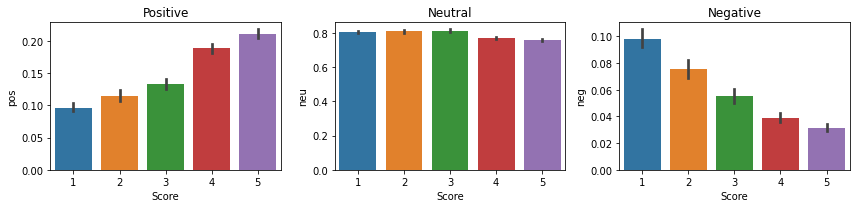

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=result_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=result_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=result_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [20]:
# Roberta Pre-trained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [21]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
my_model = AutoModelForSequenceClassification.from_pretrained(model)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [22]:
print(example)

These singles sell for $2.50 - $3.36 at the store for 1 box of 24 singles. I'm not sure why Amazon is selling it for $9.99 for a box of 24 singles.  Hazelnut coffee creamer is my favorite, but truly this is not a good buy.


In [25]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = my_model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.70836955, 'roberta_neu': 0.23563279, 'roberta_pos': 0.055997476}


In [26]:
# Remove all 3 star reviews because 3 star is considered as neutral
df_new = pd.read_csv("/content/Reviews.csv")
df_new = df_new.loc[df_new['Score']!=3]
df_new = df_new.head(10000)
df_new.Score.value_counts()

5    6776
4    1545
1    1033
2     646
Name: Score, dtype: int64

In [27]:
df_new = df_new.sample(frac=1)
df_new_before = df_new.loc[(df_new['Score']<4) & (df_new['Id']<8000),]
df_new_after = df_new.loc[df_new['Id']>=8000,]
df_new = pd.concat([df_new_before, df_new_after])
df_new = df_new.sample(frac=1)
df_new['Id'] = np.arange(0, len(df_new))
df_new = df_new.reset_index()
df_new = df_new.drop(columns=['index'])
df_new.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,B006N3IG4K,A3J0QAR99EITWT,J. Riggs,0,0,5,1327363200,Yum!!,I am not a huge morning coffee person as this ...
1,1,B001EQ5536,A1YWY8U6UZTRFJ,Barbara R. Harvey,0,0,5,1300147200,Great stuff,"<a href=""http://www.amazon.com/gp/product/B001..."
2,2,B0001VWGWI,A1IWZAYY9GTLGL,"concurrent1 ""concurrent1""",0,0,5,1334966400,Best chili powder I ever tried!,I had a recipe that called for a lot of dark c...
3,3,B001LXYA5Q,A8J6QQIG6J6UB,"Frank Griffith ""FGriffith""",4,6,4,1233532800,It works as stated.,I tried two lemons after dissolving two tablet...
4,4,B001LNZG9U,A2VOXM69U838K0,"Ret Hink ""Ret Hink""",2,6,1,1287792000,"PURE = 99%, Brilliant strategy from Lakewood's...","First Indiana Jones found the ""Lost Ark of the..."


In [28]:
df_new['Score'].value_counts().sort_index(ascending=False)

5    1779
4     414
2     646
1    1033
Name: Score, dtype: int64

In [33]:
# Recurrent Neural Network
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
df = df_new
df['label'] = (df['Score']>=4).astype(int)
df2 = df[['label', 'Text']]
print(df2.head())

   label                                               Text
0      1  I am not a huge morning coffee person as this ...
1      1  <a href="http://www.amazon.com/gp/product/B001...
2      1  I had a recipe that called for a lot of dark c...
3      1  I tried two lemons after dissolving two tablet...
4      0  First Indiana Jones found the "Lost Ark of the...


In [34]:
df2['label'].value_counts()

1    2193
0    1679
Name: label, dtype: int64

In [35]:
tokenizer = Tokenizer(num_words=5000, split=' ') # num_words: the number of mosst frequent words returned.
tokenizer.fit_on_texts(df2['Text'].values)
encoded_docs = tokenizer.texts_to_sequences(df2['Text'].values)
X = pad_sequences(encoded_docs, maxlen = 1000) # maxlen: the mex length of sequence(vector) in this matrix.
X.shape

(3872, 1000)

In [36]:
y = df2['label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3872,)
(3097, 1000) (3097,) (775, 1000) (775,)


In [37]:
model = tf.keras.Sequential()
model.add(Embedding(1000, 64, input_length = X.shape[1]))
model.add(LSTM(176, dropout=0.4, recurrent_dropout=0.4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 176)               169664    
                                                                 
 dropout (Dropout)           (None, 176)               0         
                                                                 
 dense (Dense)               (None, 32)                5664      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 239,361
Trainable params: 239,361
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [39]:
batch_size=128
history = model.fit(X_train, y_train, epochs=13, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/13
25/25 [==============================] - 129s 5s/step - loss: 0.6838 - accuracy: 0.6048 - val_loss: 0.5597 - val_accuracy: 0.7303
Epoch 2/13
25/25 [==============================] - 107s 4s/step - loss: 0.4298 - accuracy: 0.8137 - val_loss: 0.5191 - val_accuracy: 0.7961
Epoch 3/13
25/25 [==============================] - 109s 4s/step - loss: 0.3624 - accuracy: 0.8582 - val_loss: 0.4406 - val_accuracy: 0.8168
Epoch 4/13
25/25 [==============================] - 109s 4s/step - loss: 0.3288 - accuracy: 0.8712 - val_loss: 0.4177 - val_accuracy: 0.8335
Epoch 5/13
25/25 [==============================] - 107s 4s/step - loss: 0.3446 - accuracy: 0.8644 - val_loss: 0.5500 - val_accuracy: 0.7574
Epoch 6/13
25/25 [==============================] - 110s 4s/step - loss: 0.2502 - accuracy: 0.9073 - val_loss: 0.4664 - val_accuracy: 0.8400
Epoch 7/13
25/25 [==============================] - 110s 4s/step - loss: 0.1870 - accuracy: 0.9248 - val_loss: 0.5592 - val_accuracy: 0.8065
Epoch 8/13
25

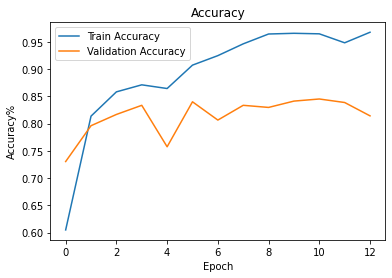

In [40]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy%')
plt.legend()
plt.show()

In [41]:
def anal_sent(my_text, my_model, my_tokenizer):
  encoded_text = my_tokenizer.texts_to_sequences(my_text)
  X = pad_sequences(encoded_text, maxlen = 1000)
  return (my_model.predict(X))

In [42]:
ex_review0 = ["Nice but just a little bit pricy"]
print(anal_sent(ex_review0, model, tokenizer))

1/1 [==============================] - 1s 516ms/step
[[0.99849546]]


In [43]:
ex_review1 = ["I bought it for my son and he says he likes it."]
print(anal_sent(ex_review1, model, tokenizer))

1/1 [==============================] - 0s 245ms/step
[[0.99655956]]


In [44]:
ex_review2 = ["It actually tastes better than I expected."]
print(anal_sent(ex_review2, model, tokenizer))

1/1 [==============================] - 0s 240ms/step
[[0.9604544]]


In [45]:
ex_review3 = ["It tastes too sour. Not recommended!"]
print(anal_sent(ex_review3, model, tokenizer))

1/1 [==============================] - 0s 250ms/step
[[0.6255139]]


In [46]:
ex_review4 = ["Even the dogs wouldn't eat it! Half star if I could."]
print(anal_sent(ex_review4, model, tokenizer))

1/1 [==============================] - 0s 269ms/step
[[0.1321918]]


In [47]:
ex_review5 = ['This is too salty and has strange after taste, so I am not sure about whether it has artificial additives? I threw it all away after tasting just one slice!']
print(anal_sent(ex_review5, model, tokenizer))

1/1 [==============================] - 0s 237ms/step
[[0.0011664]]


In [48]:
ex_review6 = ["Bought it for my husband. He loved it. Will re-order more."]
print(anal_sent(ex_review6, model, tokenizer))

1/1 [==============================] - 0s 237ms/step
[[0.99996245]]


In [49]:
ex_review7 = ["Came with 4 peices all the same size. Wasnt as wet and juicy as the beef jerky but still good. Will definitely buy again. Only negative is because i don't live near the store front lol."]
print(anal_sent(ex_review7, model, tokenizer))

1/1 [==============================] - 0s 239ms/step
[[0.99862766]]


In [50]:
ex_review8 = ["Absolutely loving this. Reminds me of home. Very glad that the product like this is being sold in the states."]
print(anal_sent(ex_review8, model, tokenizer))

1/1 [==============================] - 0s 342ms/step
[[0.00464825]]


In [51]:
ex_review9 = ["Good quality, good taste, a must-have snack while watching TV."]
print(anal_sent(ex_review9, model, tokenizer))

1/1 [==============================] - 0s 249ms/step
[[0.9997993]]


In [52]:
ex_review10 = ["Excellent taste, great chew, fast service, somewhat expensive"]
print(anal_sent(ex_review10, model, tokenizer))

1/1 [==============================] - 0s 250ms/step
[[0.9991917]]


In [53]:
ex_review11 = ["I do not like the texture. They’re too hard to chew, I’m from Thailand and know how they should taste."]
print(anal_sent(ex_review11, model, tokenizer))

1/1 [==============================] - 0s 248ms/step
[[0.01678935]]


In [54]:
ex_review12 = ["It is way too expensive. I only ate one piece and then soon abandoned it."]
print(anal_sent(ex_review12, model, tokenizer))

1/1 [==============================] - 0s 398ms/step
[[0.11712559]]


In [56]:
# Bidirectional LSTM:
from keras.layers import Bidirectional
model2 = tf.keras.Sequential()
model2.add(Embedding(1000, 64, input_length = X.shape[1]))
model2.add(Bidirectional(LSTM(176, dropout=0.4, recurrent_dropout=0.4)))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 352)              339328    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 352)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                11296     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 414,657
Trainable params: 414,657
Non-trainable params: 0
________________________________________________

In [59]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [60]:
batch_size=128
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
25/25 [==============================] - 222s 9s/step - loss: 0.4708 - accuracy: 0.7872 - val_loss: 0.4313 - val_accuracy: 0.8077
Epoch 2/10
25/25 [==============================] - 213s 9s/step - loss: 0.3388 - accuracy: 0.8628 - val_loss: 0.4806 - val_accuracy: 0.8000
Epoch 3/10
25/25 [==============================] - 215s 9s/step - loss: 0.2817 - accuracy: 0.8922 - val_loss: 0.4100 - val_accuracy: 0.8348
Epoch 4/10
25/25 [==============================] - 216s 9s/step - loss: 0.2535 - accuracy: 0.8999 - val_loss: 0.4780 - val_accuracy: 0.8323
Epoch 5/10
25/25 [==============================] - 215s 9s/step - loss: 0.2163 - accuracy: 0.9180 - val_loss: 0.4311 - val_accuracy: 0.8452
Epoch 6/10
25/25 [==============================] - 228s 9s/step - loss: 0.1666 - accuracy: 0.9354 - val_loss: 0.4252 - val_accuracy: 0.8632
Epoch 7/10
25/25 [==============================] - 214s 9s/step - loss: 0.1446 - accuracy: 0.9464 - val_loss: 0.4842 - val_accuracy: 0.8555
Epoch 8/10
25

In [78]:
# Transformers Pipeline:
from transformers import pipeline
correct = 0
total = 0
sent_pipeline = pipeline("sentiment-analysis")
for i in tqdm(range(df2.shape[0])):
  try:
    pip_pred = sent_pipeline(df2['Text'][i])
    if ((pip_pred[0]['label']=='POSITIVE') and (df2["label"][i]==1)):
      correct = correct+1
    if ((pip_pred[0]['label']=='NEGATIVE') and (df2["label"][i]==0)):
      correct = correct+1
    total = total+1
  except:
    print('Too long')
print(correct/total)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Token indices sequence length is longer than the specified maximum sequence length for this model (726 > 512). Running this sequence through the model will result in indexing errors


Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
Too long
0.8803664921465969
